In [126]:
#! pip uninstall -y pillow-heif !! NEED TO REFRESH THE WINDOW IF THE PACKAGE ISN'T WORKING
! pip install pillow-heif==0.21.0 #0.7.0
! pip install avif==0.5.0
# --upgrade

In [127]:
! pip show avif # Version: 0.5.0
! pip show pillow-heif # Version: 0.21.0

Name: avif
Version: 0.5.0
Summary: Python bindings for libavif
Home-page: https://github.com/Julian/avif
Author: Julian Berman
Author-email: Julian+avif@GrayVines.com
License: 
Location: /home/peter/Documents/work/vggt-test/vggt/.venv/lib/python3.11/site-packages
Requires: attrs, cffi
Required-by: 
Name: pillow_heif
Version: 0.21.0
Summary: Python interface for libheif library
Home-page: https://github.com/bigcat88/pillow_heif
Author: Alexander Piskun
Author-email: bigcat88@users.noreply.github.com
License: BSD-3-Clause
Location: /home/peter/Documents/work/vggt-test/vggt/.venv/lib/python3.11/site-packages
Requires: pillow
Required-by: 


from _avif import ffi, lib

In [128]:

import pillow_heif
import numpy as np

pillow_heif.register_avif_opener()

if pillow_heif.is_supported("lux_cam/11:29:20_camera_depth_10.avif"): #out/16:43:33_camera_depth_20.avif #out/11:27:13_camera_depth_34.avif   out/14:34:44_camera_depth_4.avif  out/16:07:40_camera_depth_3.avif  out/14:51:04_camera_depth_82.avif  out/12:36:12_camera_depth_77.avif
    avif_file = pillow_heif.open_heif("lux_cam/11:29:20_camera_depth_10.avif", convert_hdr_to_8bit=False) #out/14:01:27_camera_depth_17.avif
    print("image size:", avif_file.size)
    print("image mode:", avif_file.mode)
    print("image data length:", len(avif_file.data))
    print("image data stride:", avif_file.stride)

    realsense_array = np.asarray(avif_file)


image size: (640, 480)
image mode: I;16
image data length: 614400
image data stride: 1280


In [129]:
pillow_heif.register_avif_opener()


if pillow_heif.is_supported("lux_vggt/11:29:20_vggt_depth_10.avif"): # out/11:27:13_vggt_depth_32.avif # out/14:34:44_vggt_depth_4.avif  out/14:51:04_vggt_depth_82.avif
    avif_file = pillow_heif.open_heif("lux_vggt/11:29:20_vggt_depth_10.avif", convert_hdr_to_8bit=False)
    print("image size:", avif_file.size)
    print("image mode:", avif_file.mode)
    print("image data length:", len(avif_file.data))
    print("image data stride:", avif_file.stride)

    vggt_array = np.asarray(avif_file)

#img_vggt = Image.fromarray(np_array)
#img_vggt

image size: (518, 392)
image mode: I;16
image data length: 406112
image data stride: 1036


In [130]:
img_cam_array = realsense_array
img_vggt_array = vggt_array
img_cam_array.shape, img_vggt_array.shape, img_cam_array.dtype, img_vggt_array.dtype

((480, 640), (392, 518), dtype('uint16'), dtype('uint16'))

In [131]:
img_cam_array

array([[57024, 62486, 25718, ...,  6928,  6928,  6928],
       [ 6832,  6832,  6832, ...,  6928,  6928,  6928],
       [ 6832,  6832,  6832, ...,  6928,  6928,  6928],
       ...,
       [ 6832,  6832,  6832, ...,  6896,  6896,  6896],
       [ 6832,  6832,  6832, ...,  6896,  6896,  6896],
       [ 6832,  6832,  6832, ...,  6896,  6896,  6896]], dtype=uint16)

In [132]:
img_vggt_array = np.resize(img_vggt_array, (img_cam_array.shape[0], img_cam_array.shape[1]))
img_vggt_array  # value in in mm

array([[6800, 6800, 6800, ..., 6912, 6912, 6912],
       [6912, 6928, 6928, ..., 6912, 6912, 6912],
       [6912, 6912, 6912, ..., 6928, 6928, 6928],
       ...,
       [4112, 4144, 4192, ..., 4352, 4384, 4368],
       [4336, 4304, 4304, ..., 6896, 6912, 6912],
       [6928, 6944, 6944, ..., 6928, 6928, 6928]], dtype=uint16)

In [133]:
img_vggt_array_shift = img_vggt_array >> 4
img_vggt_array_shift

array([[425, 425, 425, ..., 432, 432, 432],
       [432, 433, 433, ..., 432, 432, 432],
       [432, 432, 432, ..., 433, 433, 433],
       ...,
       [257, 259, 262, ..., 272, 274, 273],
       [271, 269, 269, ..., 431, 432, 432],
       [433, 434, 434, ..., 433, 433, 433]], dtype=uint16)

In [134]:
img_cam_array_shift = img_cam_array >> 4
img_cam_array_shift

array([[26, 26, 26, ..., 27, 27, 27],
       [27, 27, 27, ..., 27, 27, 27],
       [27, 27, 27, ..., 27, 27, 27],
       ...,
       [16, 16, 16, ..., 17, 17, 17],
       [16, 16, 16, ..., 26, 27, 27],
       [27, 27, 27, ..., 27, 27, 27]], dtype=uint16)

In [135]:
img_vggt_array_shift.min(), img_vggt_array_shift.max()

(232, 449)

In [136]:
img_cam_array_shift.min(), img_cam_array_shift.max()

(14, 28)

In [137]:
print(f"img_vggt_array_shift shape: {img_vggt_array_shift.shape}")
print(f"img_cam_array_shift shape: {img_cam_array_shift.shape}")

img_vggt_array_shift shape: (480, 640)
img_cam_array_shift shape: (480, 640)


In [138]:
'''import numpy as np

print(f'img_vggt shape: {img_vggt_array_shift.size}')
print(f'img_cam shape: {img_cam_array_shift.size}')
img_vggt_array_shift_flat = img_vggt_array_shift.flatten()
img_cam_array_shift_flat = img_cam_array_shift.flatten()

# ----- Apply filter
lower_bound = np.percentile(img_vggt_array_shift_flat, 0)
upper_bound = np.percentile(img_vggt_array_shift_flat, 5)

vggt_mask = (
    (img_cam_array_shift_flat >= 0)
    & (img_vggt_array_shift_flat >= 0)
    & (img_vggt_array_shift_flat >= lower_bound)
    & (img_vggt_array_shift_flat <= upper_bound)
)

lower = np.percentile(img_cam_array_shift_flat, 0)
upper = np.percentile(img_cam_array_shift_flat, 5)

cam_mask = (
    (img_cam_array_shift_flat >= 0)
    & (img_vggt_array_shift_flat >= 0)
    & (img_cam_array_shift_flat >= lower)
    & (img_cam_array_shift_flat <= upper)
)

joint_mask = vggt_mask & cam_mask

img_vggt_full = np.full((480 * 640,), np.nan)
img_cam_full = np.full((480 * 640,), np.nan)

img_vggt_full[joint_mask] = img_vggt_array_shift_flat[joint_mask]
img_cam_full[joint_mask] = img_cam_array_shift_flat[joint_mask]

print(f"img_vggt_full shape: {img_vggt_full.shape}")
print(f"img_cam_full shape: {img_cam_full.shape}")
# Reshape back to (480, 640)
img_vggt_full = img_vggt_full.reshape(480, 640)
img_cam_full = img_cam_full.reshape(480, 640)

print(f"img_vggt_full shape: {img_vggt_full.shape}")
print(f"img_cam_full shape: {img_cam_full.shape}")'''


'import numpy as np\n\nprint(f\'img_vggt shape: {img_vggt_array_shift.size}\')\nprint(f\'img_cam shape: {img_cam_array_shift.size}\')\nimg_vggt_array_shift_flat = img_vggt_array_shift.flatten()\nimg_cam_array_shift_flat = img_cam_array_shift.flatten()\n\n# ----- Apply filter\nlower_bound = np.percentile(img_vggt_array_shift_flat, 0)\nupper_bound = np.percentile(img_vggt_array_shift_flat, 5)\n\nvggt_mask = (\n    (img_cam_array_shift_flat >= 0)\n    & (img_vggt_array_shift_flat >= 0)\n    & (img_vggt_array_shift_flat >= lower_bound)\n    & (img_vggt_array_shift_flat <= upper_bound)\n)\n\nlower = np.percentile(img_cam_array_shift_flat, 0)\nupper = np.percentile(img_cam_array_shift_flat, 5)\n\ncam_mask = (\n    (img_cam_array_shift_flat >= 0)\n    & (img_vggt_array_shift_flat >= 0)\n    & (img_cam_array_shift_flat >= lower)\n    & (img_cam_array_shift_flat <= upper)\n)\n\njoint_mask = vggt_mask & cam_mask\n\nimg_vggt_full = np.full((480 * 640,), np.nan)\nimg_cam_full = np.full((480 * 640,

In [139]:
'''upper_bound = 0.38
lower_bound = 0
img_vggt_array_shift_flat = np.where(
    (img_vggt_array_shift_flat <= upper_bound & img_vggt_array_shift_flat >= lower_bound), 0, img_vggt_array_shift_flat
)
img_cam_array_shift_flat = np.where(
    (img_cam_array_shift_flat <= upper_bound & img_cam_array_shift_flat >= lower_bound), 0, img_cam_array_shift_flat
)

vggt_mask = (
    (img_cam_array_shift_flat >= 0)
    & (img_vggt_array_shift_flat >= 0)
    & (img_vggt_array_shift_flat >= lower_bound)
    & (img_vggt_array_shift_flat <= upper_bound)
)

lower = np.percentile(img_cam_array_shift_flat, 0)
upper = np.percentile(img_cam_array_shift_flat, 10)

cam_mask = (
    (img_cam_array_shift_flat >= 0)
    & (img_vggt_array_shift_flat >= 0)
    & (img_cam_array_shift_flat >= lower)
    & (img_cam_array_shift_flat <= upper)
)

joint_mask = vggt_mask & cam_mask

img_vggt_full = np.full((480 * 640,), np.nan)
img_cam_full = np.full((480 * 640,), np.nan)

img_vggt_full[joint_mask] = img_vggt_array_shift_flat[joint_mask]
img_cam_full[joint_mask] = img_cam_array_shift_flat[joint_mask]
'''

'upper_bound = 0.38\nlower_bound = 0\nimg_vggt_array_shift_flat = np.where(\n    (img_vggt_array_shift_flat <= upper_bound & img_vggt_array_shift_flat >= lower_bound), 0, img_vggt_array_shift_flat\n)\nimg_cam_array_shift_flat = np.where(\n    (img_cam_array_shift_flat <= upper_bound & img_cam_array_shift_flat >= lower_bound), 0, img_cam_array_shift_flat\n)\n\nvggt_mask = (\n    (img_cam_array_shift_flat >= 0)\n    & (img_vggt_array_shift_flat >= 0)\n    & (img_vggt_array_shift_flat >= lower_bound)\n    & (img_vggt_array_shift_flat <= upper_bound)\n)\n\nlower = np.percentile(img_cam_array_shift_flat, 0)\nupper = np.percentile(img_cam_array_shift_flat, 10)\n\ncam_mask = (\n    (img_cam_array_shift_flat >= 0)\n    & (img_vggt_array_shift_flat >= 0)\n    & (img_cam_array_shift_flat >= lower)\n    & (img_cam_array_shift_flat <= upper)\n)\n\njoint_mask = vggt_mask & cam_mask\n\nimg_vggt_full = np.full((480 * 640,), np.nan)\nimg_cam_full = np.full((480 * 640,), np.nan)\n\nimg_vggt_full[joint_

In [140]:
img_vggt_array_shift.min(), img_vggt_array_shift.max()

(232, 449)

In [141]:
img_cam_array_shift.min(), img_cam_array_shift.max()

(14, 28)

In [142]:
# depth / loss computing has nothing to do with inference

import sys
sys.path.append("/home/peter/Documents/work/dora/node-hub/dora-pyrealsense/dora_pyrealsense")
from vggt.utils.geometry import unproject_depth_map_to_point_map
sys.path.append("/home/peter/Documents/work/dora/node-hub/dora-vggt/dora_vggt")
import torch

with torch.no_grad():
    intrinsic = torch.tensor([[[[508.9365,   0.0000, 259.0000],
    [  0.0000, 509.1042, 196.0000],
    [  0.0000,   0.0000,   1.0000]],
    [[508.8002,   0.0000, 259.0000],
    [  0.0000, 508.2620, 196.0000],
    [  0.0000,   0.0000,   1.0000]]]])
    print(f"Depth map shape: {intrinsic.shape}")
    
    extrinsic = torch.tensor([[[[ 1.0000e+00,  6.8355e-05,  9.3864e-05,  2.1935e-05],
    [-6.8351e-05,  1.0000e+00, -4.2380e-05,  1.1137e-05],
    [-9.3867e-05,  4.2374e-05,  1.0000e+00,  1.1900e-05]],
    [[ 7.2249e-01,  1.2504e-01,  6.7998e-01, -7.3870e-01],
    [-4.3752e-02,  9.8981e-01, -1.3553e-01,  3.4955e-02],
    [-6.9000e-01,  6.8166e-02,  7.2060e-01,  1.9991e-01]]]],)
    print(f"Depth map shape: {extrinsic.shape}")

    depth_map = img_vggt_array_shift[np.newaxis,np.newaxis,:,:, np.newaxis]  # Reshape to [1, 1, H, W]
    print(f"Depth map shape: {depth_map.shape}")

    depth_map_cam = img_cam_array_shift[np.newaxis,np.newaxis,:,:, np.newaxis]  # Reshape to [1, 1, H, W]

    point_map_by_unprojection = unproject_depth_map_to_point_map(depth_map.squeeze(0), 
                                                                extrinsic.squeeze(0), 
                                                                intrinsic.squeeze(0))

    point_map_by_unprojection_cam = unproject_depth_map_to_point_map(depth_map_cam.squeeze(0), 
                                                                extrinsic.squeeze(0), 
                                                                intrinsic.squeeze(0))
    
    z_value = point_map_by_unprojection[0, :, :, 2]  # S, H, W, 3

    cam_z_value = point_map_by_unprojection_cam[0, :, :, 2]  # S, H, W, 3

    print(f"z cam min :{cam_z_value.min()} ")
    print(f"z vggt min :{z_value.min()} ")
    print(f"z cam max :{cam_z_value.max()} ")
    print(f"z vggt max :{z_value.max()} ")
    scale_factor = 0.37 #/ z_value.mean()) # min?

    #scale_factor = float(0.11) / y_value.max() / 1000

    print(
        f"Scale factor: {scale_factor}, with height: {0.11} and max depth: {point_map_by_unprojection[0, :, :, 1].max()}"
    )
    print(
        f" 0. all min and max depth values: {point_map_by_unprojection[0, :, :, 0].min()} / {point_map_by_unprojection[0, :, :, 0].max()}"
    )
    print(
        f" 1. all min and max depth values: {point_map_by_unprojection[0, :, :, 1].min()} / {point_map_by_unprojection[0, :, :, 1].max()}"
    )
    print(
        f" 2. all min and max depth values: {point_map_by_unprojection[0, :, :, 2].min()} / {point_map_by_unprojection[0, :, :, 2].max()}"
    )

    print(
        f"Depth map before scaling: min and max: {depth_map.min()} / {depth_map.max()}"
    )

    depth_map = (
        depth_map /1000 * scale_factor
    )  # Scale depth map to the desired depth
    print(
        f"Depth map after scaling min and max in meters: {depth_map.min()} / {depth_map.max()}. Depth map shape: {depth_map.shape}"
    )




Depth map shape: torch.Size([1, 2, 3, 3])
Depth map shape: torch.Size([1, 2, 3, 4])
Depth map shape: (1, 1, 480, 640, 1)


z cam min :13.999228446505319 
z vggt min :231.9953168888922 
z cam max :28.002258443151902 
z vggt max :449.03210919186745 
Scale factor: 0.37, with height: 0.11 and max depth: 243.48714679303097
 0. all min and max depth values: -228.04193157049008 / 334.44898501092155
 1. all min and max depth values: -170.14244669820695 / 243.48714679303097
 2. all min and max depth values: 231.9953168888922 / 449.03210919186745
Depth map before scaling: min and max: 232 / 449
Depth map after scaling min and max in meters: 0.08584 / 0.16613. Depth map shape: (1, 1, 480, 640, 1)


In [143]:
'''# -- LOSS FUNCTION
def loss(cam_depth, vggt_depth, scale_factor, joint_mask):
    joint_mask = joint_mask.reshape(480, 640)  # Reshape to match depth map dimensions
    rmse = np.sqrt(np.mean((scale_factor * vggt_depth - cam_depth) ** 2, where= joint_mask))/ 1000

    return rmse

print(f"img_vggt_full shape: {img_vggt_full.shape}")
print(f"img_cam_full shape: {img_cam_full.shape}")
loss_value = loss(img_vggt_full, img_cam_full, scale_factor=0.41, joint_mask=joint_mask)
print(f"Loss: {loss_value}")'''

'# -- LOSS FUNCTION\ndef loss(cam_depth, vggt_depth, scale_factor, joint_mask):\n    joint_mask = joint_mask.reshape(480, 640)  # Reshape to match depth map dimensions\n    rmse = np.sqrt(np.mean((scale_factor * vggt_depth - cam_depth) ** 2, where= joint_mask))/ 1000\n\n    return rmse\n\nprint(f"img_vggt_full shape: {img_vggt_full.shape}")\nprint(f"img_cam_full shape: {img_cam_full.shape}")\nloss_value = loss(img_vggt_full, img_cam_full, scale_factor=0.41, joint_mask=joint_mask)\nprint(f"Loss: {loss_value}")'

In [144]:
# -- LOSS FUNCTION
def loss(cam_depth, vggt_depth, scale_factor, upper_bound_vggt= 400, upper_bound_cam= 450, lower_bound=200):
    # Apply filter
    joint_mask = (
        (cam_depth <= upper_bound_cam) & (cam_depth > 0) &
        (scale_factor * vggt_depth <= upper_bound_vggt) & (scale_factor * vggt_depth >= lower_bound)
    )
    rmse = np.sqrt(np.mean(((scale_factor * vggt_depth) - cam_depth) ** 2), where= joint_mask) / 1000

    cam_depth = cam_depth[joint_mask]
    vggt_depth = vggt_depth[joint_mask]

    return rmse, cam_depth, vggt_depth

In [145]:
# --- aggregate loss
gather = []
mean_loss = []
mean_sf = []
loss_list = []
for factor in np.arange(0, 1, 0.01):
    loss_value, img_cam_array_shift, img_vggt_array_shift = loss(
        img_cam_array_shift, img_vggt_array_shift, scale_factor=factor
    )
    loss_value = np.mean(loss_value)
    loss_list.append(loss_value)

# Find vertex of loss curve
def find_vertex(loss_list):
    idx = np.argmin(loss_list)
    return loss_list[idx], idx / 100

vertex, sf = find_vertex(loss_list)
gather.append(vertex)
mean = np.mean(gather)
mean_loss.append(mean)
mean_sf.append(sf)


/home/peter/Documents/work/vggt-test/vggt/.venv/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/peter/Documents/work/vggt-test/vggt/.venv/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [2]:
from jupyterthemes import jtplot

# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork', context='notebook', ticks=True, grid=True, figsize=(10, 6))

In [147]:
'''import matplotlib.pyplot as plt

loss_list = []
for factor in np.arange(0, 1, 0.01):
    #print(f"Factor: {factor}")
    loss_value = loss(vggt_depth=img_vggt_array_shift, cam_depth=img_cam_array_shift, scale_factor=factor)
    loss_list.append(loss_value)

print(f"Loss: {loss_list}")

plt.plot(np.arange(0, 1, 0.01), loss_list)
plt.xlabel('Scale Factor (m)')
plt.ylabel('Loss (m)')
plt.title('Loss vs Scale Factor')
plt.show()'''

'import matplotlib.pyplot as plt\n\nloss_list = []\nfor factor in np.arange(0, 1, 0.01):\n    #print(f"Factor: {factor}")\n    loss_value = loss(vggt_depth=img_vggt_array_shift, cam_depth=img_cam_array_shift, scale_factor=factor)\n    loss_list.append(loss_value)\n\nprint(f"Loss: {loss_list}")\n\nplt.plot(np.arange(0, 1, 0.01), loss_list)\nplt.xlabel(\'Scale Factor (m)\')\nplt.ylabel(\'Loss (m)\')\nplt.title(\'Loss vs Scale Factor\')\nplt.show()'

In [148]:
'''def find_vertex(loss_list):
    idx = np.argmin(loss_list)
    return loss_list[idx], idx / 100

loss, vertex = find_vertex(loss_list)
print(f"Loss: {loss}, At scale factor: {vertex}")'''

'def find_vertex(loss_list):\n    idx = np.argmin(loss_list)\n    return loss_list[idx], idx / 100\n\nloss, vertex = find_vertex(loss_list)\nprint(f"Loss: {loss}, At scale factor: {vertex}")'

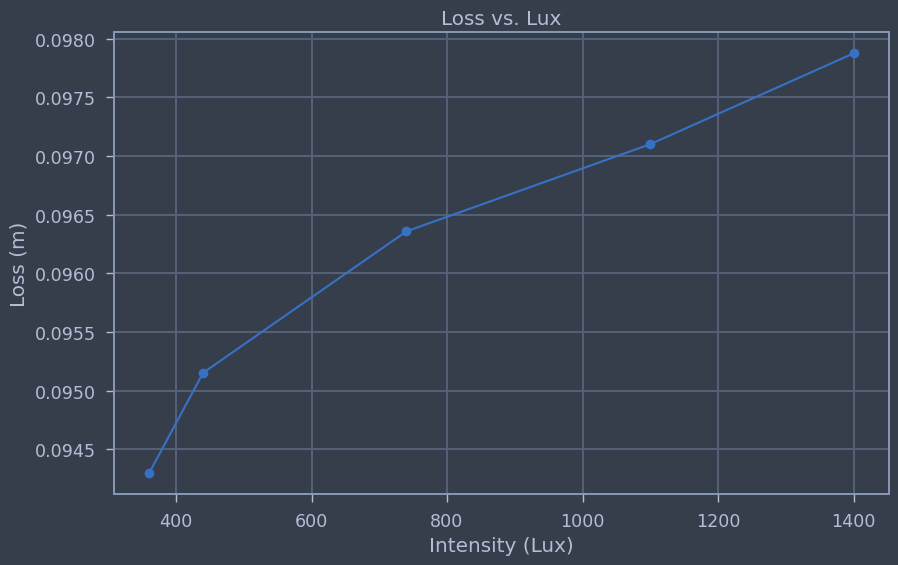

In [149]:
import numpy as np
import matplotlib.pyplot as plt

lux_list= [360,440,740,1100,1400]
loss_list = np.log([ 0.0889344, 0.0907575, 0.0915708, 0.0920039, 0.1112716])
white = [0.0942963, 0.0951536, 0.0963581, 0.0971009, 0.0978744 ]

# wait for the new results to come out


plt.plot(lux_list, white, marker='o')
plt.xlabel('Intensity (Lux)')
plt.ylabel('Loss (m)')
plt.title('Loss vs. Lux')
plt.show()

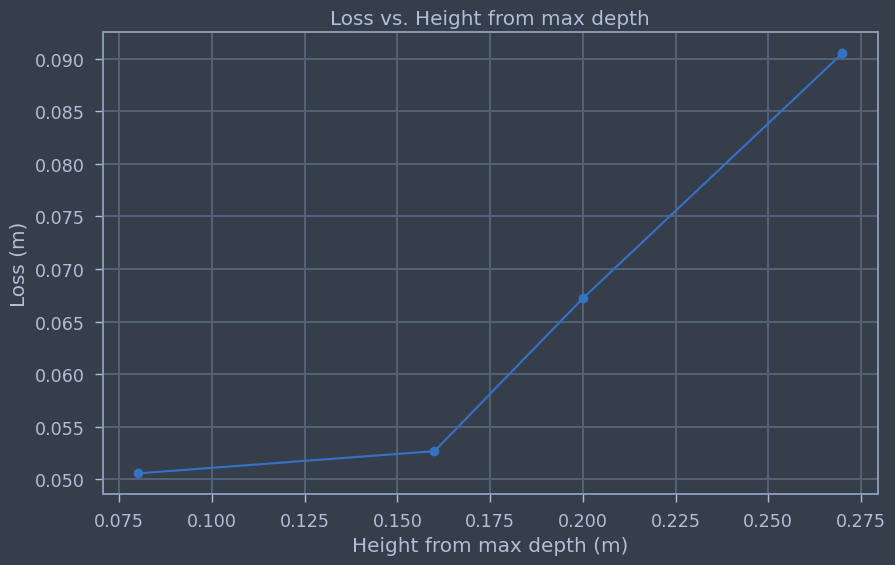

In [3]:
# graph on different objects
import matplotlib.pyplot as plt
loss = [ 0.0904970, 0.0672041, 0.0526818, 0.0505679] 
dis_from_max = [0.27, 0.20, 0.16, 0.08]

plt.plot(dis_from_max, loss, marker='o')
plt.xlabel('Height from max depth (m)')
plt.ylabel('Loss (m)')
plt.title('Loss vs. Height from max depth')
plt.show()

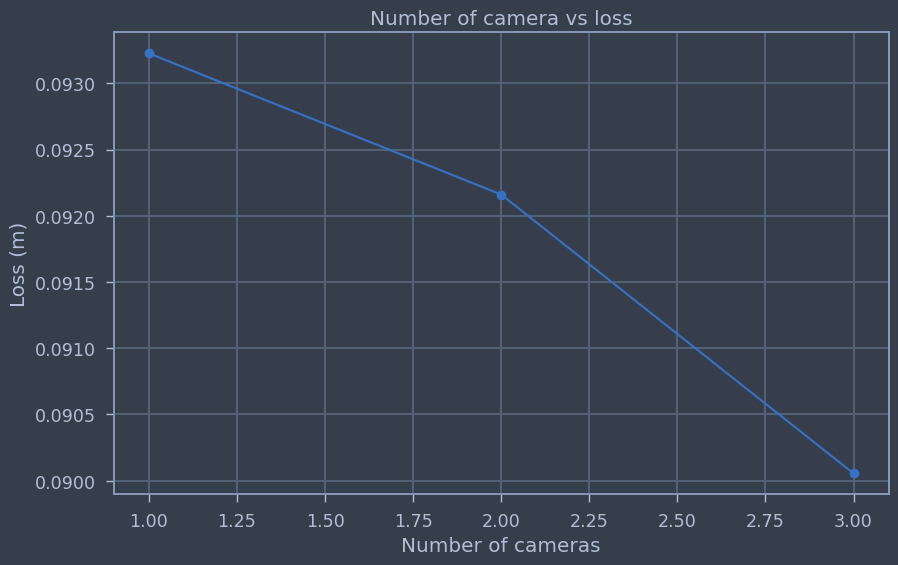

In [151]:
# graph loss on num cam
import matplotlib.pyplot as plt
loss = [0.0932259,  0.0921600, 0.0900553]
num_cam = [1,2,3]


plt.plot(num_cam, loss, marker='o')
plt.xlabel('Number of cameras')
plt.ylabel('Loss (m)')
plt.title('Number of camera vs loss')
plt.show()

TypeError: Invalid shape (0,) for image data

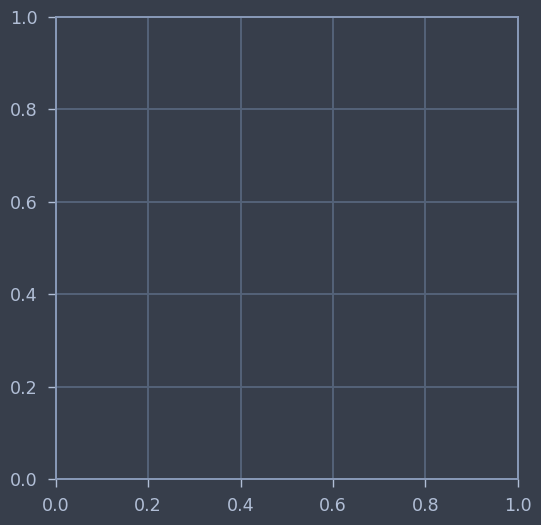

In [152]:
#img_vggt_array_shift - img_cam_array_shift
# img_vggt_full - img_cam_full

plt.imshow((img_vggt_array_shift - img_cam_array_shift)/1000,  cmap='RdYlGn_r', vmin=0, vmax= 1)
plt.colorbar()
plt.title('Difference between VGGt and GT Depth Maps: before scaling')
plt.show()


In [ ]:
img_vggt_array_shift - img_cam_array_shift

In [ ]:
scale_factor = 0.38
scale_factor * img_vggt_array_shift - img_cam_array_shift

In [ ]:
#img_vggt_array_shift - img_cam_array_shift
scale_factor = 0.43

plt.imshow((scale_factor * img_vggt_full - img_cam_full)/1000,  cmap='RdYlGn_r', vmin=0, vmax= 1)
plt.colorbar()
plt.title('Difference between VGGt and GT Depth Maps: scaled')
plt.show()